# STOCK PRICE PREDICTION USING LSTM

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20, 10
from sklearn.preprocessing import MinMaxScaler
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM

Using TensorFlow backend.


In [2]:
dft = pd.read_csv("nse_stock.csv")

In [3]:
dft.head(50)

,SYMBOL,SERIES,OPEN,HIGH,LOW,LAST,PREVCLOSE,TOTTRDQTY,TOTTRDVAL,TIMESTAMP,TOTALTRADES,CLOSE
0,20MICRONS,EQ,37.80,37.80,36.15,37.40,37.05,27130,9.946579e+05,2017-06-28,202,36.85
1,3IINFOTECH,EQ,4.10,4.85,4.00,4.65,4.05,20157058,9.214852e+07,2017-06-28,7353,4.55
2,3MINDIA,EQ,13425.15,13469.55,12920.00,13300.00,13460.55,2290,3.030492e+07,2017-06-28,748,13266.70
3,63MOONS,EQ,61.00,61.90,60.35,61.10,60.65,27701,1.689421e+06,2017-06-28,437,61.00
4,8KMILES,EQ,546.10,548.00,535.00,535.20,547.45,79722,4.320862e+07,2017-06-28,1866,537.45
5,A2ZINFRA,EQ,41.30,43.00,41.25,41.90,41.50,606403,2.553118e+07,2017-06-28,3418,42.00
6,AARTIDRUGS,EQ,539.90,539.90,520.00,522.20,536.55,8560,4.508882e+06,2017-06-28,569,521.85
7,AARTIIND,EQ,890.95,894.90,876.90,890.00,890.00,39201,3.482538e+07,2017-06-28,2778,891.30
8,AARVEEDEN,EQ,58.20,61.20,57.00,59.80,58.85,14401,8.558168e+05,2017-06-28,223,59.50
9,ABAN,EQ,183.00,184.65,180.80,181.90,182.65,447698,8.178944e+07,2017-06-28,5449,182.10


Take input symbol for retrieving the data of required company from above dataset.

In [4]:
inpstr=input('Enter the name of symbol: ')

Enter the name of symbol: KDDL


In [5]:
df=dft[dft['SYMBOL']==inpstr]       #filter dataset by name of stock
print(df.head(10))

      SYMBOL SERIES    OPEN    HIGH     LOW    LAST  PREVCLOSE  TOTTRDQTY  \
805     KDDL     EQ  189.85  191.75  186.05  191.50     186.60       2041   
2581    KDDL     EQ  336.00  338.95  325.05  327.10     336.00      11475   
4366    KDDL     EQ  187.00  187.00  183.35  186.80     187.05        438   
6096    KDDL     EQ  216.00  224.00  216.00  223.75     221.60      11953   
7849    KDDL     EQ  184.05  193.00  182.50  184.10     186.35       9238   
9590    KDDL     EQ  196.35  204.50  196.35  201.00     198.15       5124   
11344   KDDL     EQ  204.95  205.00  192.80  195.00     202.50       8915   
13107   KDDL     EQ  179.60  181.90  171.55  173.40     179.60      13196   
14851   KDDL     EQ  209.00  213.45  202.50  208.00     209.00       6617   
16593   KDDL     EQ  191.05  191.55  187.00  187.25     190.05       7310   

        TOTTRDVAL   TIMESTAMP  TOTALTRADES   CLOSE  
805     386268.55  2017-06-28           71  189.80  
2581   3815261.40  2017-11-28          444  32

/home/hp/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


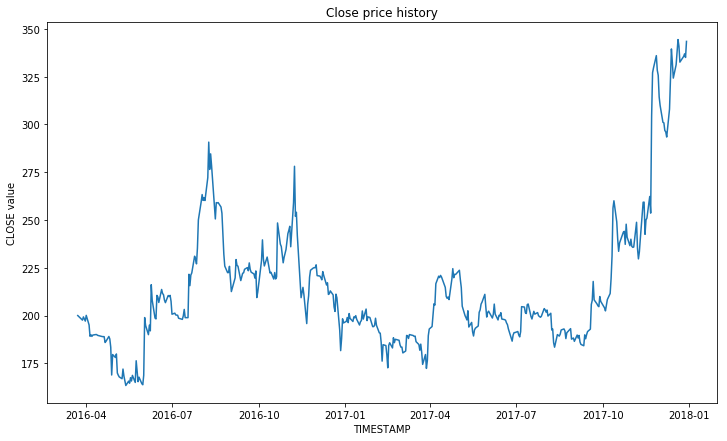

In [6]:
df['TIMESTAMP'] = pd.to_datetime(df.TIMESTAMP,format='%Y-%m-%d')
df.index = df['TIMESTAMP']

data = df.sort_index(ascending=True, axis=0)
plt.figure(figsize=(12,7))
plt.plot(data['CLOSE'], label='Close Price history')
plt.title('Close price history')
plt.xlabel('TIMESTAMP')
plt.ylabel('CLOSE value')
plt.show()

In [7]:
#creating dataframe

new_data = pd.DataFrame(index=range(0,len(df)),columns=['Date', 'Close'])
for i in range(0,len(data)):
    new_data['Date'][i] = data['TIMESTAMP'][i]
    new_data['Close'][i] = data['CLOSE'][i]

#setting index
new_data.index = new_data.Date
new_data.drop('Date', axis=1, inplace=True)

In [8]:
#creating train and valid sets
dataset = new_data.values
j = (int)(3/4*len(dataset))
train = dataset[0:j,:]
valid = dataset[j:,:]


In [9]:

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

/home/hp/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [10]:
#converting dataset into x_train and y_train
x_train, y_train = [], []
for i in range(60,len(train)):
    x_train.append(scaled_data[i-60:i,0])
    y_train.append(scaled_data[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)

In [11]:
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

In [12]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50))
model.add(Dense(1))

In [13]:
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_train, y_train, epochs=1, batch_size=1, verbose=2,)    #train the model

Epoch 1/1
 - 14s - loss: 0.0078


In [14]:
#predicting values, using past 60 from the train data
inputs = new_data[len(new_data) - len(valid) - 60:].values
inputs = inputs.reshape(-1,1)
inputs  = scaler.transform(inputs)


In [15]:
X_test = []
for i in range(60,inputs.shape[0]):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)


In [16]:
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
closing_price = model.predict(X_test)
closing_price = scaler.inverse_transform(closing_price)
rms=np.sqrt(np.mean(np.power((valid-closing_price),2)))
print(rms)

22.906613390512565


/home/hp/.local/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


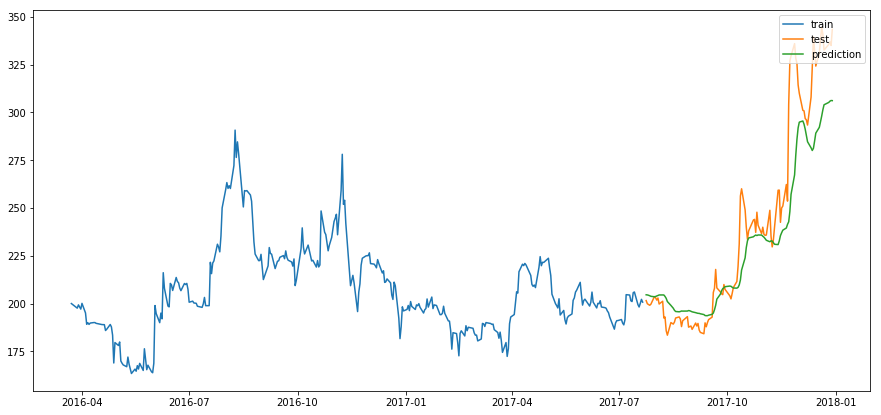

In [17]:
#for plotting
train = new_data[:j]
valid = new_data[j:]
valid['Predictions'] = closing_price
plt.figure(figsize=(15,7))
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(('train','test','prediction'),loc='upper right')

plt.show()